In [2]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, matplotlib as mpl
import mplhep as hep
hep.style.use("CMS")

plt.rcParams['figure.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.rcParams['savefig.bbox']='tight'

try :
    os.mkdir("images")
except :
    pass


plt.rcParams["figure.figsize"] = (10, 8)

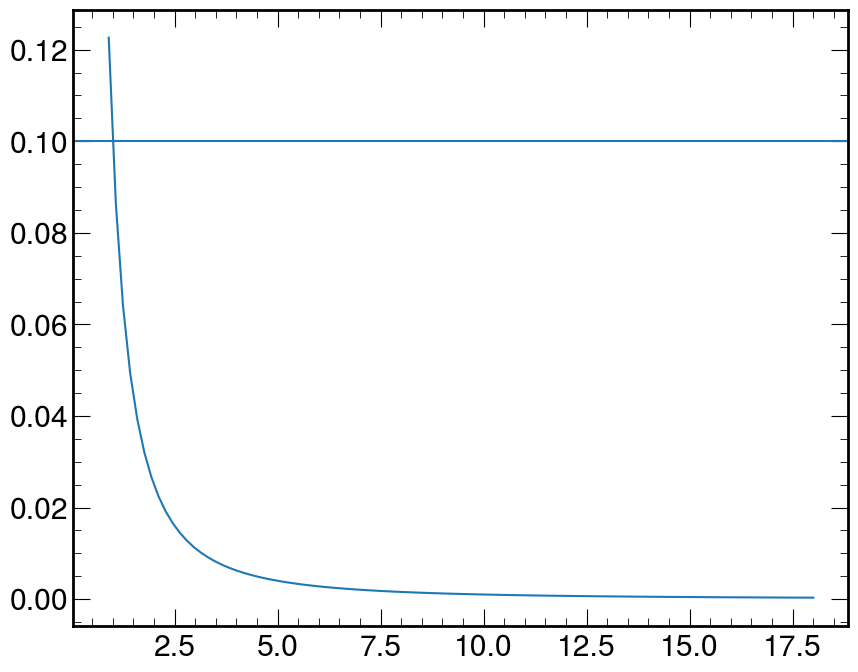

In [3]:
second=1e9
meter=100
c=299792458*meter/second


z=307

t_res=0.100

m_e=0.511e-3
m_pi=0.1397

p=np.linspace(0.9, 18, 100)
beta_e=p/np.hypot(p, m_e)
beta_pi=p/np.hypot(p, m_pi)

t_e=z/(beta_e*c)
t_pi=z/(beta_pi*c)

plt.plot(p,abs(t_e-t_pi))
plt.axhline(t_res)


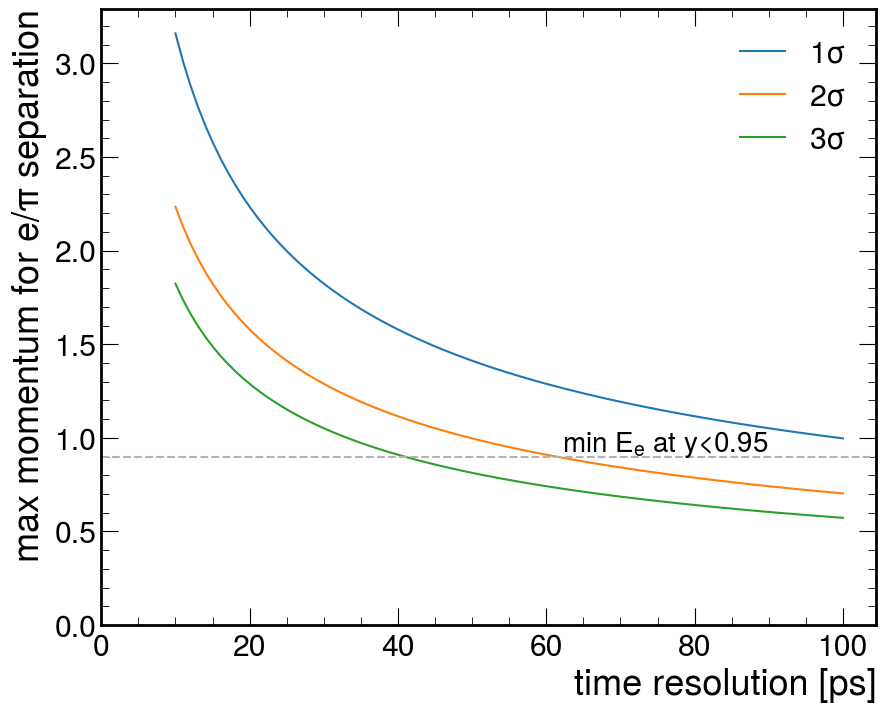

In [12]:
t_res=np.linspace(.01, 0.100,90)
for nsig in 1, 2,3:
    beta=1/(1+c*nsig*t_res/z)
    p=m_pi*beta/np.sqrt(1-beta**2)
    plt.plot(t_res*1000, p, label=f'${nsig}\\sigma$')
plt.legend()
plt.xlabel("time resolution [ps]")
plt.ylabel("max momentum for e/$\pi$ separation")
plt.ylim(0)
plt.xlim(0)
plt.axhline(0.9, linestyle='--', color='0.7')
plt.text(90, 0.93, "min $E_e$ at y<0.95", ha='right', fontsize=20)
plt.savefig("images/time_requirements.pdf")

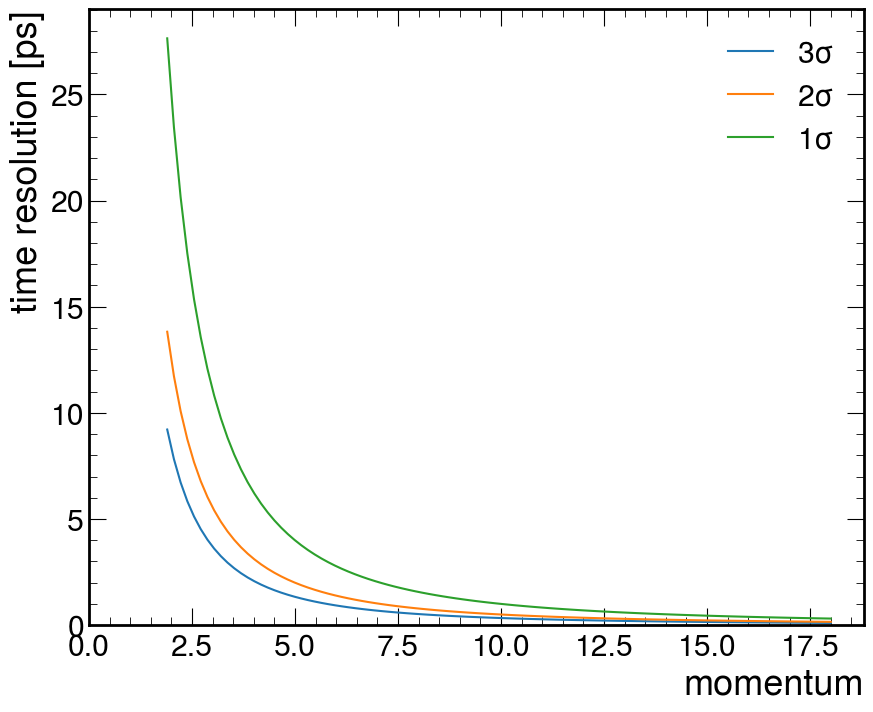

In [5]:
p=np.linspace(1.9, 18,100)
#print(p)
for nsig in 3, 2,1:
    beta_pi=p/np.hypot(m_pi, p)
    #print(p, delta_t)
    beta_e=1
    delta_t=abs(z/(beta_pi*c)-z/(beta_e*c))
    plt.plot(p, 1000*delta_t/nsig, label=f'${nsig}\\sigma$')
plt.legend()
plt.ylabel("time resolution [ps]")
plt.xlabel("momentum")
plt.ylim(0)
plt.xlim(0)
#plt.axhline(0.9, linestyle='--', color='0.7')
#plt.text(95, 0.9, "min $e^-$ energy at y<0.95", ha='right', fontsize=16)
plt.savefig("images/time_requirements.pdf")
plt.show()

In [42]:
help(np.sqrt)

Help on ufunc:

sqrt = <ufunc 'sqrt'>
    sqrt(x, /, out=None, *, where=True, casting='same_kind', order='K', dtype=None, subok=True[, signature, extobj])
    
    Return the non-negative square-root of an array, element-wise.
    
    Parameters
    ----------
    x : array_like
        The values whose square-roots are required.
    out : ndarray, None, or tuple of ndarray and None, optional
        A location into which the result is stored. If provided, it must have
        a shape that the inputs broadcast to. If not provided or None,
        a freshly-allocated array is returned. A tuple (possible only as a
        keyword argument) must have length equal to the number of outputs.
    where : array_like, optional
        This condition is broadcast over the input. At locations where the
        condition is True, the `out` array will be set to the ufunc result.
        Elsewhere, the `out` array will retain its original value.
        Note that if an uninitialized `out` array is 